In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import folium
from folium import Choropleth

In [2]:
# Read csv to pandas and show so informations

business_data = pd.read_json('business.json', lines=True)
business = pd.DataFrame(business_data)
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [3]:
# Group value count by states to plot on map

state_count = business.state.value_counts()
state_count

AZ     60803
NV     39084
ON     36627
OH     16392
NC     16218
PA     12376
QC     10233
AB      8682
WI      5525
IL      2034
SC      1328
CA        23
NY        22
TX         6
WA         5
AL         3
FL         3
GA         3
VT         2
CO         2
UT         2
MI         2
BC         2
NE         2
CT         2
AK         1
AR         1
HI         1
YT         1
XWY        1
DOW        1
VA         1
HPL        1
OR         1
MB         1
MO         1
DUR        1
Name: state, dtype: int64

In [4]:
# Create a base map
maps = folium.Map(location=[42.391009,-96.754189], tiles='cartodbpositron', zoom_start=3)

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"

# Add a choropleth map to the base map
Choropleth(geo_data=state_geo, 
           data=state_count, 
           key_on="feature.id", 
           fill_color='YlGnBu',
           fill_opacity=0.7,
           line_opacity=0.5,
           legend_name='Yelp Restaurants'
          ).add_to(maps)

# Display the map
maps

Text(0.5, 1.0, 'Number of restaurants by city')

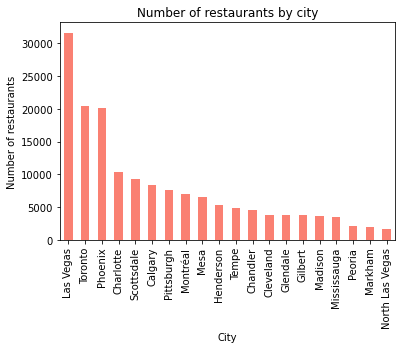

In [5]:
# Plot restaurants in US cities

city_count = business.city.value_counts()
city_count[0:20].plot(kind="bar", color="salmon")
plt.xlabel('City')
plt.ylabel('Number of restaurants')
plt.title('Number of restaurants by city')

Text(0.5, 1.0, 'Stars given to restaurants')

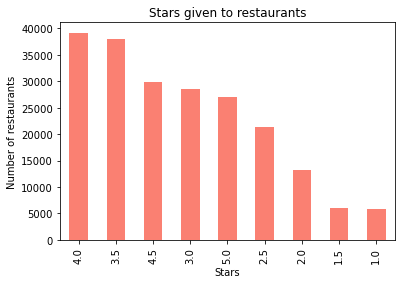

In [6]:
# Plot star given to restaurants 

star_count = business.stars.value_counts()
star_count.plot(kind="bar", color="salmon")
plt.xlabel('Stars')
plt.ylabel('Number of restaurants')
plt.title('Stars given to restaurants')

Text(0.5, 1.0, 'Restaurants names')

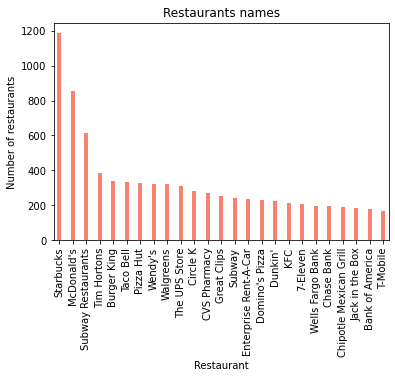

In [7]:
# Plot number of restaurants 

name_count = business.name.value_counts()
name_count[0:25].plot(kind="bar", color="salmon", width=0.3)
plt.xlabel('Restaurant')
plt.ylabel('Number of restaurants')
plt.title('Restaurants names')

Text(0.5, 1.0, 'Restaurants names')

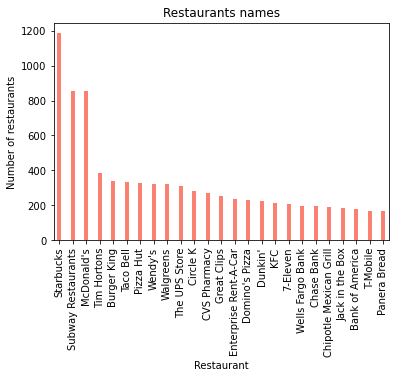

In [8]:
# Subway Restaurants and Subway are same, so need to merge it
name_count = business.replace(regex={r'^Subway$' : 'Subway Restaurants'}).name.value_counts()

# Plot number of restaurants 
name_count[0:25].plot(kind="bar", color="salmon", width=0.3)
plt.xlabel('Restaurant')
plt.ylabel('Number of restaurants')
plt.title('Restaurants names')

Text(0.5, 1.0, 'Average stars by city')

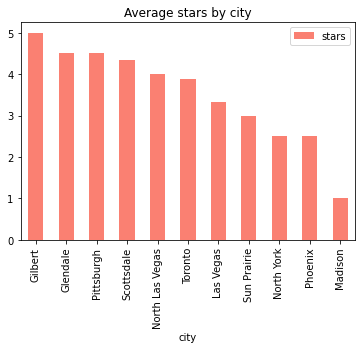

In [9]:
# Avg stars by cities with high dense restaurant cities

city_count_stars = city_count[0:20]                 # Most occurance restaurant cities
sample = business.iloc[city_count_stars, :]         # Filter with high occurance cities

# Group by city, calculata mean stars and plot
sample[["city", "stars"]].groupby('city').mean().sort_values(by=['stars'],ascending=False).plot(kind='bar', color="salmon")

plt.title('Average stars by city')

In [10]:
# Read csv to pandas and show so informations

review = pd.read_csv('review.csv')
review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5.0,0.0,0.0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1.0,1.0,0.0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1.0,0.0,0.0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0.0,0.0,0.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0.0,0.0,0.0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


In [11]:
review_sample = review.iloc[:, 2:8]
review_sample = review_sample[["stars","useful","funny","cool","business_id"]]
review_sample.head()

,stars,useful,funny,cool,business_id
0,2.0,5.0,0.0,0.0,-MhfebM0QIsKt87iDN-FNw
1,1.0,1.0,1.0,0.0,lbrU8StCq3yDfr-QMnGrmQ
2,5.0,1.0,0.0,0.0,HQl28KMwrEKHqhFrrDqVNQ
3,1.0,0.0,0.0,0.0,5JxlZaqCnk1MnbgRirs40Q
4,4.0,0.0,0.0,0.0,IS4cv902ykd8wj1TR0N3-A


In [12]:
business_sample = business.iloc[:, 0:2]
business_sample.head()

,business_id,name
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD"
2,XNoUzKckATkOD1hP6vghZg,Felinus
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC


In [13]:
review_sample['name'] = review_sample.business_id.map(business_sample.set_index('business_id')['name'])

In [14]:
top_restaurants = review_merged.name.value_counts().index[0:20].tolist()
# top_restaurants

top_restaurants_review = review_merged.loc[review_merged['name'].isin(top_restaurants)]
top_restaurants_review

NameError: name 'review_merged' is not defined

In [ ]:
review_sample.head()